In [ ]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

# Wczytanie zbioru cech nieruchomości i ich cen
boston_nieruchomosci = load_boston()

print('Klucze dostępne w zbiorze danych: ', boston_nieruchomosci.keys())
print(boston_nieruchomosci.DESCR)


In [ ]:
print('Przykładowe wartości cech:\n', boston_nieruchomosci.data[:3])
print('Przykładowe kwoty: ', boston_nieruchomosci.target[:3])

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

import seaborn as sns

# konwersja na obiekt pandas.DataFrame
boston_df = pd.DataFrame(boston_nieruchomosci['data'], columns=boston_nieruchomosci['feature_names'])

# doklejenie informacji o cenie do reszty dataframe
boston_df['target'] = np.array(list(boston_nieruchomosci['target']))

# wykres
sns.pairplot(boston_df)
plt.show()

In [ ]:
# Dużo zmiennych... na początek spróbujmy z jedną
l_pokoi = boston_nieruchomosci['data'][:, np.newaxis, 5]
plt.scatter(l_pokoi, boston_nieruchomosci['target'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Stworzenie regresora liniowego
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(l_pokoi, boston_nieruchomosci['target'], test_size = 0.3)

linreg.fit(X_train, y_train)

# przewidywanie ceny
y_pred = linreg.predict(X_test)

# domyślna metryka
print('Metryka domyślna: ', linreg.score(X_test, y_test))

# wskaźnik (metryka) r^2
# dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
print('Metryka r2: ', r2_score(y_test, y_pred))

# współczynniki regresji
print('Współczynniki regresji:\n', linreg.coef_)

# Wykres regresji
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

In [ ]:
# dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.model_selection import cross_val_score

cv_score_r2 = cross_val_score(linreg, l_pokoi, boston_nieruchomosci.target, cv=5, scoring='r2')
print(cv_score_r2)

# używamy innej metryki 
# dokumentacja:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
cv_score_ev = cross_val_score(linreg, l_pokoi, boston_nieruchomosci.target, cv=5, scoring='explained_variance')
print(cv_score_ev)

# ...i jeszcze innej
cv_score_mse = cross_val_score(linreg, l_pokoi, boston_nieruchomosci.target, cv=5, scoring='neg_mean_squared_error')
print(cv_score_mse)

In [ ]:
# Zadanie 1
# Wybierz inną cechę i spróbuj przewidzieć ceny mieszkań. Użyj walidacji krzyżowej.
# Zadanie bonus: zaimportuj dane nt cukrzycy przy pomocy funkcji load_diabetes
# Następnie przeanalizuj dane i zaproponuj regresor liniowy. Sprawdź jakość modelu za pomocą walidacji krzyżowej.




Przykładowe wartości cech:
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]






Przykładowe kwoty:
[24.  21.6 34.7 33.4 36.2 28.7 22.9]






Elementy w zbiorze
['data', 'target', 'feature_names', 'DESCR', 'filename']






Klucze w zbiorze
dict_keys(['data', 'target', 'feature_names', 'DESCR

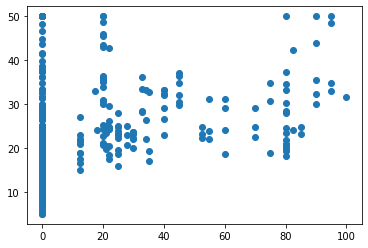




domyślna metryka
0.07465714260048162






Metryka r2:
0.07465714260048162






regresja:
[0.18489302]






Wykres regresji:





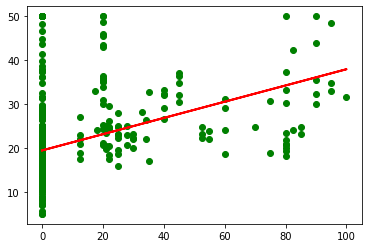




Wynik CV_r2:
[-0.07810069  0.10813571 -0.62473021 -0.05834771 -1.53983917]






Wynik CV_ev:
[-0.02995919  0.11256445 -0.05133459  0.        ]






Wynik CV_mse:
[ -30.55149295 -117.91020488 -101.11748385 -102.53032123]



Wynik max błędu:
[-22.93573611 -30.4550255  -30.00008264 -18.56081028]


In [9]:
#Zadanie 1
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

# Wczytanie zbioru cech nieruchomości i ich cen
boston_nieruchomosci = load_boston()
boston_df = pd.DataFrame(boston_nieruchomosci['data'], columns=boston_nieruchomosci['feature_names'])

# doklejenie informacji o cenie do reszty dataframe
boston_df['target'] = np.array(list(boston_nieruchomosci['target']))

#Przykładowe wartości
print("\n\n")
print("Przykładowe wartości cech:")
print(boston_nieruchomosci.data[:5])
print("\n\n")

#Przykładowe wartości
print("\n\n")
print("Przykładowe kwoty:")
print(boston_nieruchomosci.target[:7])
print("\n\n")

#elementy zbioru
print("\n\n")
print("Elementy w zbiorze")
print(list(boston_nieruchomosci.keys()))
print("\n\n")

#Klucze
print("\n\n")
print("Klucze w zbiorze")
print(boston_nieruchomosci.keys())
print("\n\n")

#opis
#taguje bo za duzo zajmuje
#print("\n\n")
#print("Opis")
#print(boston_nieruchomosci.DESCR)
#print("\n\n")

#Pobranie przestępczości
print("\n\n")
print("Przestępczość")
print("\n\n")
crime = boston_nieruchomosci['data'][:, np.newaxis, 1]
plt.scatter(crime, boston_nieruchomosci['target'])
plt.show()



# Stworzenie regresora liniowego
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(crime, boston_nieruchomosci['target'], test_size = 0.8)

linreg.fit(X_train, y_train)

# przewidywanie przestępstw w mieście na osobę
y_pred = linreg.predict(X_test)

# domyślna metryka
print("\n\n")
print("domyślna metryka")
print(linreg.score(X_test, y_test))
print("\n\n")

# wskaźnik (metryka) r^2
# dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
print("\n\n")
print("Metryka r2:")
print(r2_score(y_test, y_pred))
print("\n\n")

# współczynniki regresji
print("\n\n")
print("regresja:")
print(linreg.coef_)
print("\n\n")

# Wykres regresji
print("\n\n")
print("Wykres regresji:")
print("\n\n")
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

cv_score_r2 = cross_val_score(linreg, crime, boston_nieruchomosci.target, cv=5, scoring='r2')
print("\n\n")
print("Wynik CV_r2:")
print(cv_score_r2)
print("\n\n")

# używamy innej metryki 
# dokumentacja:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
cv_score_ev = cross_val_score(linreg, crime, boston_nieruchomosci.target, cv=4, scoring='explained_variance')
print("\n\n")
print("Wynik CV_ev:")
print(cv_score_ev)
print("\n\n")

# ...i jeszcze innej
print("\n\n")
print("Wynik CV_mse:")
cv_score_mse = cross_val_score(linreg, crime, boston_nieruchomosci.target, cv=4, scoring='neg_mean_squared_error')
print(cv_score_mse)


max_error = cross_val_score(linreg, crime, boston_nieruchomosci.target, cv=4, scoring='max_error')
print("\n\n")
print("Wynik max błędu:")
print(max_error)




Elementy zbioru:
['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename']






Klucze zbioru:
dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])






Wykres pobranych diabetyków:


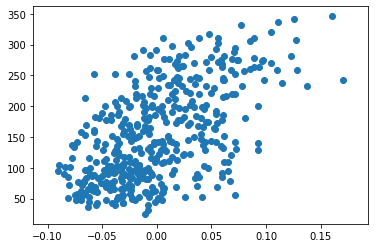







Metryka domyślna: 
0.3174137980247582






Metryka r2: 
0.3174137980247582






Regresja: 
[992.68292326]






Wykres regresji: 


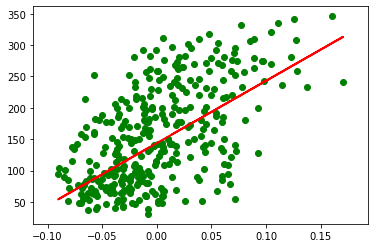







Wynik CV_r2:
[0.20669771 0.37001525 0.38937267 0.29361018 0.36254055]






Wynik CV_ev:
[0.25914325 0.29417095 0.33612338 0.42268307 0.31645427 0.36007462]






Wynik CV_mse:
[-3670.27632988 -4476.36855413 -3599.91198418 -4180.91620868
 -3831.58198042 -3678.17997574]






Wynik max błędu:
[-140.58045956 -155.93964119 -151.58133407 -133.74728388 -154.67771948
 -165.74657774]


In [12]:
#zadanie bonus
# Zadanie bonus: zaimportuj dane nt cukrzycy przy pomocy funkcji load_diabetes
# Następnie przeanalizuj dane i zaproponuj regresor liniowy. Sprawdź jakość modelu za pomocą walidacji krzyżowej.
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


%matplotlib inline
#Wczytywanie zbioru diabetycy
diab = load_diabetes()


diab_df = pd.DataFrame(diab['data'], columns=diab['feature_names'])

diab_df['target'] = np.array(list(diab['target']))

print("\n\n")
print("Elementy zbioru:")
print(list(diab.keys()))
print("\n\n")


print("\n\n")
print("Klucze zbioru:")
print(diab.keys())
print("\n\n")


#opis
#zablokowany - za dużo zajmuje
#print(diab.DESCR)


#wykres diabetykow
print("\n\n")
print("Wykres pobranych diabetyków:")
lata = diab['data'][:, np.newaxis, 2]
plt.scatter(lata, diab['target'])
plt.show()
print("\n\n")


# regresora liniowego
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(lata, diab['target'], test_size = 0.8)

linreg.fit(X_train, y_train)

# cukrzycy, a wieku 
y_pred = linreg.predict(X_test)

# domyślna metryka
print("\n\n")
print("Metryka domyślna: ")
print(linreg.score(X_test, y_test))
print("\n\n")

# wskaźnik (metryka) r^2
# dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
print("\n\n")
print("Metryka r2: ")
print(r2_score(y_test, y_pred))
print("\n\n")

# regresja
print("\n\n")
print("Regresja: ")
print(linreg.coef_)
print("\n\n")

# Wykres regresji
print("\n\n")
print("Wykres regresji: ")
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
print("\n\n")

cv_score_r2 = cross_val_score(linreg, lata, diab.target, cv=5, scoring='r2')
print("\n\n")
print("Wynik CV_r2:")
print(cv_score_r2)
print("\n\n")

# używamy innej metryki 
# dokumentacja:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
cv_score_ev = cross_val_score(linreg, lata, diab.target, cv=6, scoring='explained_variance')
print("\n\n")
print("Wynik CV_ev:")
print(cv_score_ev)
print("\n\n")

# ...i jeszcze innej
cv_score_mse = cross_val_score(linreg, lata, diab.target, cv=6, scoring='neg_mean_squared_error')
print("\n\n")
print("Wynik CV_mse:")
print(cv_score_mse)
print("\n\n")

max_error = cross_val_score(linreg, lata, diab.target, cv=6, scoring='max_error')
print("\n\n")
print("Wynik max błędu:")
print(max_error)
